## Analysing Garmin running data 

How to get the latest data from Garmin Connect

- Activities - select running symbol - select Advanced symbol
- Create your Date Range 
- Select Filter Activities
- Export csv -> Activities.csv

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/Activities.csv")
df = df[df['Activity Type']=="Running"]
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) 
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True) 
df['Time'] = pd.to_timedelta(df['Time'].dt.time.astype(str)).dt.total_seconds()
df['Time'] = np.round((df['Time']/60),2)
df['Moving Time'] = pd.to_datetime(df['Moving Time'], infer_datetime_format=True) 
df['Moving Time'] = pd.to_timedelta(df['Moving Time'].dt.time.astype(str)).dt.total_seconds()
df['Moving Time'] = np.round((df['Moving Time']/60),2)
df['Elapsed Time'] = pd.to_datetime(df['Elapsed Time'], infer_datetime_format=True) 
df['Elapsed Time'] = pd.to_timedelta(df['Elapsed Time'].dt.time.astype(str)).dt.total_seconds()
df['Elapsed Time'] = np.round((df['Elapsed Time']/60),2)
df['Aerobic TE'] = df['Aerobic TE'].str.replace(',', '.').astype(float)

df['Avg_Pace_minutes'] = df['Avg Pace'].str.rsplit(':').str[0].astype(int)*60 
df['Avg_Pace_seconds'] = df['Avg Pace'].str.rsplit(':').str[-1].astype(int) 
df['avg_pace_in_seconds_per_km'] = df['Avg_Pace_seconds'] + df['Avg_Pace_minutes']
df['avg_pace_in_min_per_km'] = np.round((df['avg_pace_in_seconds_per_km']/60),2)
df['avg_pace_in_kmph'] = np.round((60/df['avg_pace_in_min_per_km']),2)


df['Best_Pace_minutes'] = df['Best Pace'].str.rsplit(':').str[0].astype(int)*60
df['Best_Pace_seconds'] = df['Best Pace'].str.rsplit(':').str[-1].astype(int) 
df['best_pace_seconds_per_km'] = df['Best_Pace_seconds'] + df['Best_Pace_minutes']
df['best_pace_in_min_per_km'] = np.round((df['best_pace_seconds_per_km']/60),2)
df['best_pace_in_kmph'] = np.round((60/df['best_pace_in_min_per_km']),2)

df['Avg GCT Balance'] = df['Avg GCT Balance'].str.replace('--','')
df['Avg GCT Balance'] = df['Avg GCT Balance'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['Avg GCT Balance'].astype(str).str[0:4]
df['GCT_right'] = df['Avg GCT Balance'].astype(str).str[10:14]
df['GCT_right'] = df['GCT_right'].apply(lambda x: x.strip()).replace('', np.nan)
df['GCT_left'] = df['GCT_left'].str.replace(',', '.').astype(float)
df['GCT_right'] = df['GCT_right'].str.replace(',', '.').astype(float)
df = df.drop('Avg GCT Balance',axis=1)

convert_to_numeric = ['Total Ascent','Total Descent']
convert_to_numeric_w_comma = ['Avg Stride Length','Avg Vertical Ratio','Avg Vertical Oscillation']

for cl in convert_to_numeric:
  df[str(cl)] = pd.to_numeric(df[str(cl)], errors='coerce')

for cl in convert_to_numeric_w_comma:
  df[str(cl)] = df[str(cl)].str.replace(',', '.').astype(float)

df = df.sort_values(by='Date',ascending=True)
df['Distance_cumsum'] = df['Distance'].cumsum()

df = df.reset_index(drop=True)

df = df.fillna(0)

df = df[['Date', 'Distance', 'Distance_cumsum', 'Calories',
       'Time', 'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence',
       'Max Run Cadence', 'Avg Stride Length', 'Avg Vertical Ratio',
       'Avg Vertical Oscillation', 'Avg Ground Contact Time',
       'Moving Time', 'Elapsed Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',
       'best_pace_in_min_per_km', 'best_pace_in_kmph','GCT_left', 'GCT_right',]]

df.head(8)
#df.tail()

,Date,Distance,Distance_cumsum,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Moving Time,Elapsed Time,avg_pace_in_min_per_km,avg_pace_in_kmph,best_pace_in_min_per_km,best_pace_in_kmph,GCT_left,GCT_right
0,2022-09-20 18:35:45,5.01,5.01,381,28.38,154,179,3.5,165,175,1.05,9.1,9.8,255,28.35,28.38,5.67,10.58,4.02,14.93,51.8,48.2
1,2022-09-22 16:11:31,5.01,10.02,387,27.82,157,176,3.6,169,177,1.06,9.0,9.8,258,27.72,27.82,5.55,10.81,4.50,13.33,51.8,48.2
2,2022-09-25 10:39:39,5.02,15.04,379,27.08,156,176,3.5,169,177,1.09,8.9,9.9,255,27.03,27.08,5.40,11.11,4.45,13.48,52.2,47.8
3,2022-09-27 18:00:53,5.02,20.06,382,28.78,148,170,3.4,166,177,1.05,9.3,9.8,267,28.40,29.53,5.73,10.47,4.68,12.82,51.4,48.6
4,2022-10-03 18:56:55,5.01,25.07,378,25.65,166,182,3.7,168,173,1.16,8.6,10.2,258,25.62,25.65,5.12,11.72,4.23,14.18,52.1,47.9
5,2022-10-10 17:18:18,7.01,32.08,532,39.87,152,166,3.7,164,171,1.06,9.7,10.5,266,39.77,40.27,5.68,10.56,4.90,12.24,51.8,48.2
6,2022-10-13 17:33:47,5.03,37.11,378,28.03,152,169,3.4,167,172,1.07,9.2,10.0,265,28.00,28.03,5.57,10.77,4.70,12.77,51.5,48.5
7,2022-10-16 10:05:19,5.01,42.12,367,26.63,156,170,3.5,169,174,1.11,8.9,10.1,258,26.62,26.63,5.32,11.28,4.58,13.10,52.4,47.6


In [4]:
print(df.Date.min())

2022-09-20 18:35:45


In [5]:
print(df.Date.max())

2022-12-17 08:16:26


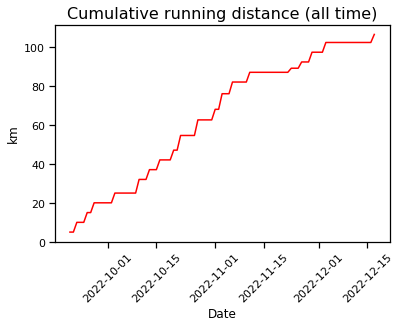

In [6]:
sns.set_context("notebook")

period = df.copy()
period.index=df.Date
del period['Date']
period = pd.DataFrame(period.groupby(pd.Grouper(freq='D'))['Distance'].sum())
period['Distance_cumsum'] = period['Distance'].cumsum()
period = period.reset_index()

"""fig = px.line(period, x="Date", y="Distance_cumsum")
fig.show(renderer="colab")"""

plt.figure()#figsize=(5,5)
line=sns.lineplot(x=period.Date, y=period.Distance_cumsum, color="r") #marker='o'
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('km',size=12)
plt.title('Cumulative running distance (all time)',size=16)
plt.show()

- Started running (consistent) since 15/8/2022 

In [7]:
print(df.shape)
df = df[df['Date']>'2022-08-14']
print(df.shape)

(20, 22)
(20, 22)


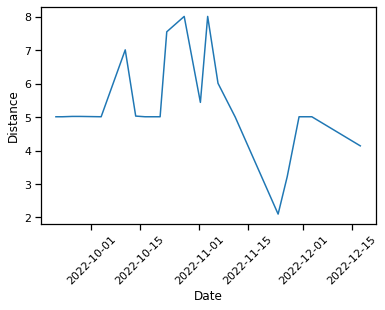

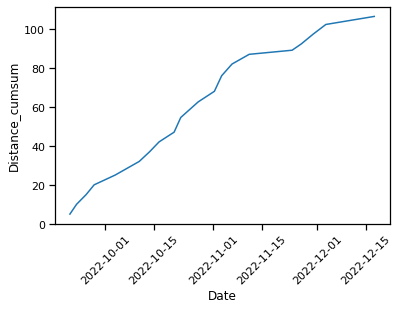

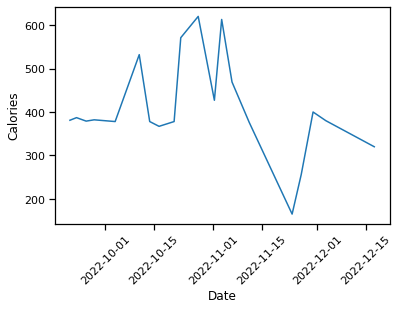

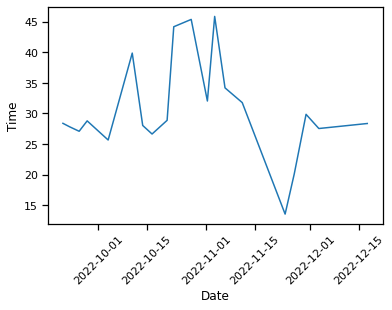

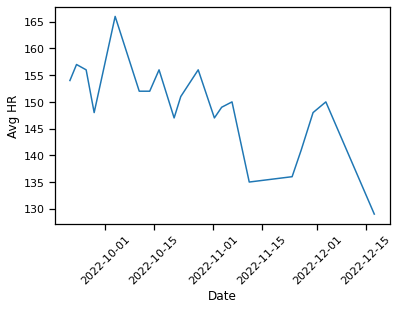

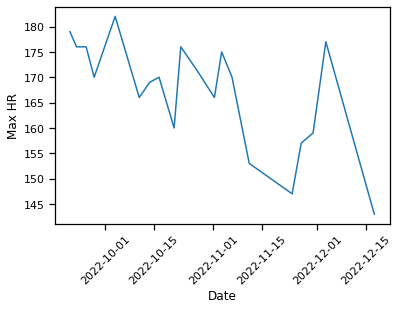

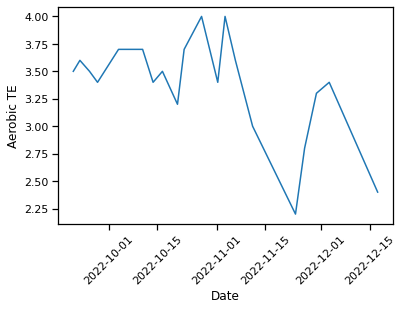

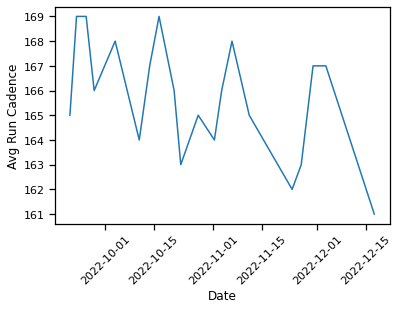

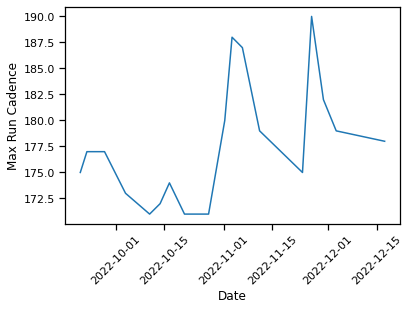

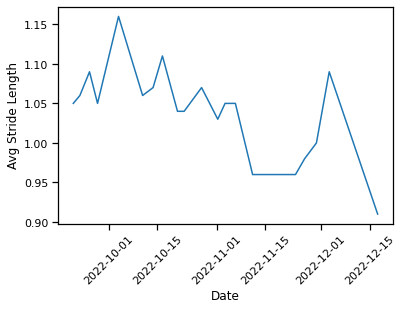

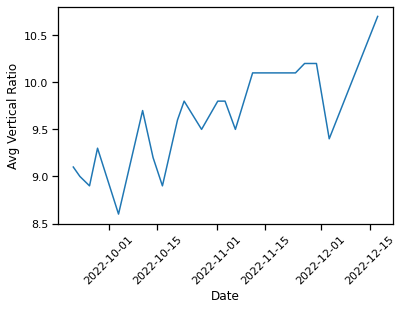

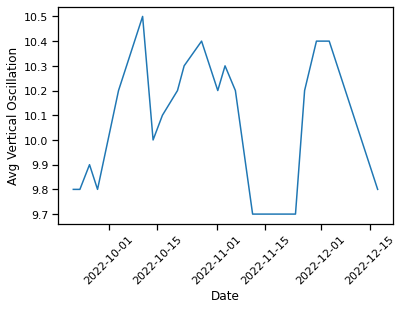

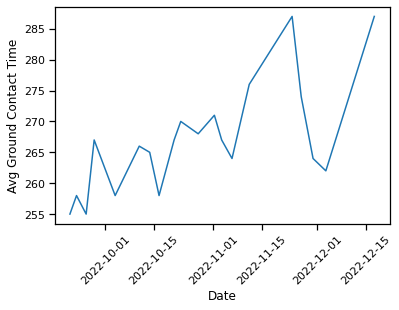

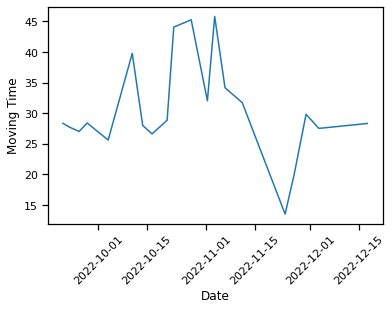

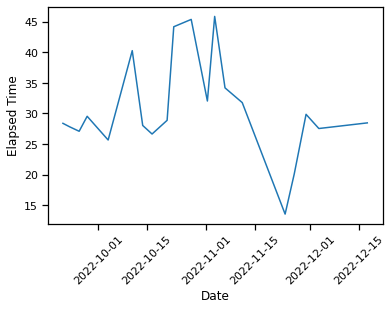

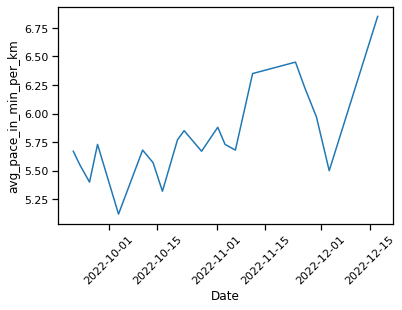

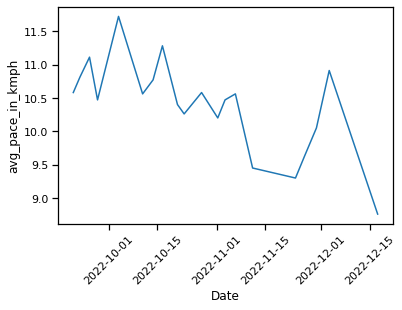

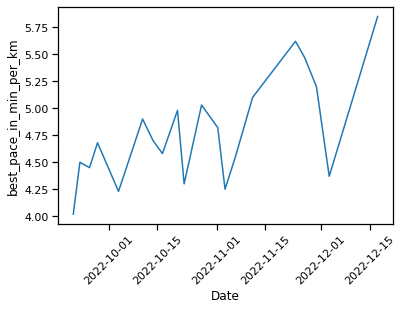

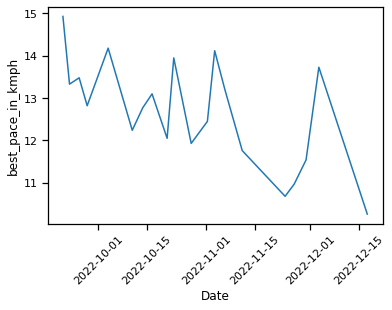

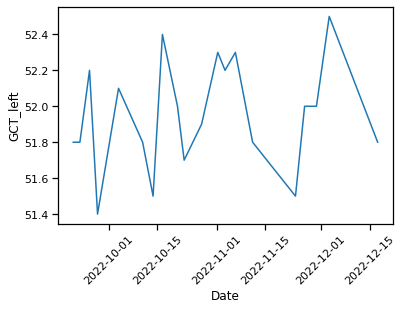

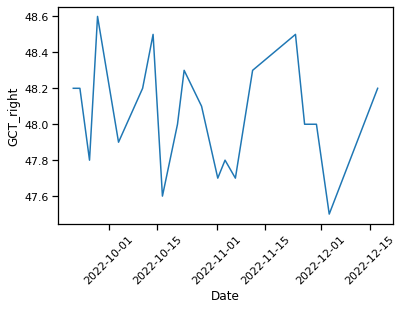

In [8]:
for cl in df.columns.to_list():
  if cl not in ['Date']:
    plt.figure()
    line=sns.lineplot(data=df, x="Date", y=str(cl)) 
    plt.xticks(rotation=45)    
    plt.xlabel('Date',size=12)
    plt.show()
  else:
    continue

In [9]:
"""df_5k = df[(df['Distance']>4.9) & (df['Distance']<5.5)]
df_5k = df_5k.drop(['Time', 'Aerobic TE', 'best_pace_in_kmph', 'best_pace_in_min_per_km', 'Moving Time','Max Run Cadence','Calories'],axis=1)
df_5k = df_5k[['Date', 'Distance','Elapsed Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',
       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',
       'Avg Ground Contact Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',
       'GCT_left', 'GCT_right']]
df_5k.sort_values(by='Date')"""

"df_5k = df[(df['Distance']>4.9) & (df['Distance']<5.5)]\ndf_5k = df_5k.drop(['Time', 'Aerobic TE', 'best_pace_in_kmph', 'best_pace_in_min_per_km', 'Moving Time','Max Run Cadence','Calories'],axis=1)\ndf_5k = df_5k[['Date', 'Distance','Elapsed Time', 'Avg HR', 'Max HR', 'Avg Run Cadence',\n       'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation',\n       'Avg Ground Contact Time', 'avg_pace_in_min_per_km','avg_pace_in_kmph',\n       'GCT_left', 'GCT_right']]\ndf_5k.sort_values(by='Date')"

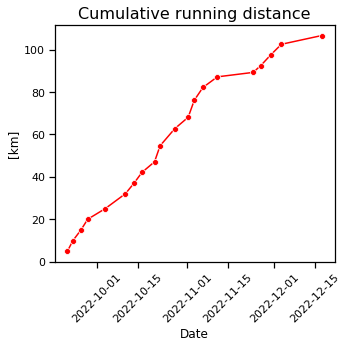

In [10]:
plt.figure(figsize=(5,5))
line=sns.lineplot(x=df.Date, y=df.Distance_cumsum, color="r", marker='o')
plt.xticks(rotation=45)
#plt.yticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')

plt.xlabel('Date',size=12)
plt.ylabel('[km]',size=12)
plt.title('Cumulative running distance',size=16)
plt.tight_layout()
plt.savefig('./images/cumulative_distance')
plt.show()

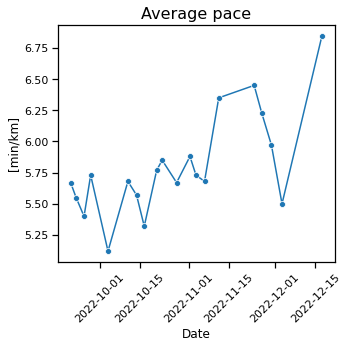

In [11]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df.avg_pace_in_min_per_km,marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[min/km]',size=12)
plt.title('Average pace',size=16)
plt.tight_layout()
plt.savefig('./images/avg_pace')

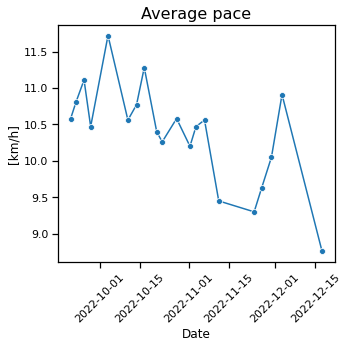

In [12]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df.avg_pace_in_kmph,marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[km/h]',size=12)
plt.title('Average pace',size=16)
plt.tight_layout()
plt.savefig('./images/avg_pace_kmph')

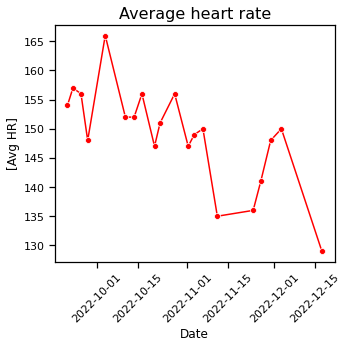

In [13]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['Avg HR'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[Avg HR]',size=12)
plt.title('Average heart rate',size=16)
plt.tight_layout()
plt.savefig('./images/avg_hr')

In [14]:
df['normalized_pace'] = df['avg_pace_in_kmph']/df['Avg HR']

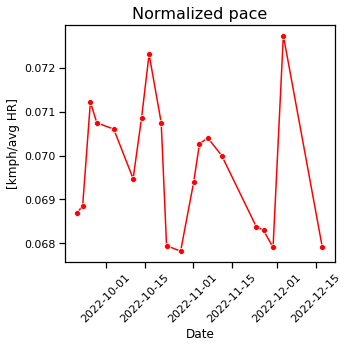

In [15]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['normalized_pace'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[kmph/avg HR]',size=12)
plt.title('Normalized pace',size=16)
plt.tight_layout()
plt.savefig('./images/normalized_pace')

In [16]:
df['normalized_hr'] = df['Avg HR']/df['avg_pace_in_kmph']

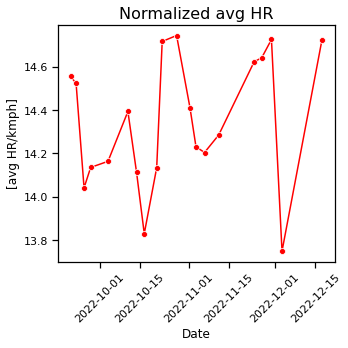

In [17]:
plt.figure(figsize=(5,5))
line = sns.lineplot(x=df.Date, y=df['normalized_hr'],color='r',marker='o')
plt.xlabel('Date',size=12)
plt.xticks(rotation=45)
plt.ylabel('[avg HR/kmph]',size=12)
plt.title('Normalized avg HR',size=16)
plt.tight_layout()
plt.savefig('./images/normalized_hr')


In [18]:
df.head()

,Date,Distance,Distance_cumsum,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Moving Time,Elapsed Time,avg_pace_in_min_per_km,avg_pace_in_kmph,best_pace_in_min_per_km,best_pace_in_kmph,GCT_left,GCT_right,normalized_pace,normalized_hr
0,2022-09-20 18:35:45,5.01,5.01,381,28.38,154,179,3.5,165,175,1.05,9.1,9.8,255,28.35,28.38,5.67,10.58,4.02,14.93,51.8,48.2,0.068701,14.555766
1,2022-09-22 16:11:31,5.01,10.02,387,27.82,157,176,3.6,169,177,1.06,9.0,9.8,258,27.72,27.82,5.55,10.81,4.50,13.33,51.8,48.2,0.068854,14.523589
2,2022-09-25 10:39:39,5.02,15.04,379,27.08,156,176,3.5,169,177,1.09,8.9,9.9,255,27.03,27.08,5.40,11.11,4.45,13.48,52.2,47.8,0.071218,14.041404
3,2022-09-27 18:00:53,5.02,20.06,382,28.78,148,170,3.4,166,177,1.05,9.3,9.8,267,28.40,29.53,5.73,10.47,4.68,12.82,51.4,48.6,0.070743,14.135626
4,2022-10-03 18:56:55,5.01,25.07,378,25.65,166,182,3.7,168,173,1.16,8.6,10.2,258,25.62,25.65,5.12,11.72,4.23,14.18,52.1,47.9,0.070602,14.163823


## To do

- Create a dataframe with:
    - amount of times I went running for each week of the year
    - average_hr
    - avg_page
    - normalized average_hr/avg_pace
- Is there a relationship between amount of times and difference in normalized average_hr/avg_pace?

In [19]:
weekly = pd.DataFrame(df.groupby([df['Date'].dt.strftime('%W')])['Distance'].sum())
weekly = weekly.reset_index()
weekly.columns = ['week','distance']
weekly.head()

,week,distance
0,38,15.04
1,39,5.02
2,40,5.01
3,41,17.05
4,42,12.56


In [20]:
weekly_hr = pd.DataFrame(df.groupby([df['Date'].dt.strftime('%W')])['normalized_hr'].median())
weekly_hr = weekly_hr.reset_index()
weekly_hr.columns = ['week','avg_normalized_hr']
weekly_hr.head()

,week,avg_normalized_hr
0,38,14.523589
1,39,14.135626
2,40,14.163823
3,41,14.113278
4,42,14.425982


In [21]:
weekly_merged = pd.merge(weekly, weekly_hr, on='week')
weekly_merged

,week,distance,avg_normalized_hr
0,38,15.04,14.523589
1,39,5.02,14.135626
2,40,5.01,14.163823
3,41,17.05,14.113278
4,42,12.56,14.425982
5,43,8.01,14.744802
6,44,19.46,14.231137
7,45,5.00,14.285714
8,47,5.32,14.632700
9,48,10.02,14.237611


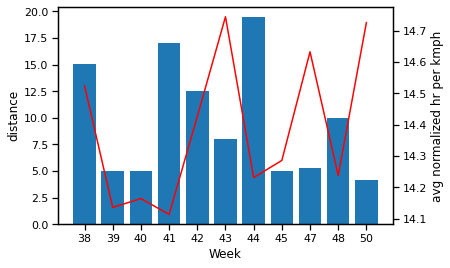

In [22]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(weekly_merged.week, weekly_merged.distance)
ax2.plot(weekly_merged.week, weekly_merged.avg_normalized_hr, color="red")

ax1.set_xlabel('Week')
ax1.set_ylabel('distance')
ax2.set_ylabel('avg normalized hr per kmph')

plt.show()

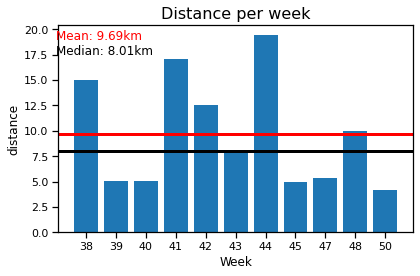

In [23]:
fig, ax1 = plt.subplots()

ax1.bar(weekly.week, weekly.distance)
ax1.set_xlabel('Week')
ax1.set_ylabel('distance')
ax1.axhline(weekly.distance.median(), color='black', linewidth=3)
ax1.axhline(weekly.distance.mean(), color='red', linewidth=3)
plt.text(-1,round(weekly.distance.max(),2)-0.5,f"Mean: {round(weekly.distance.mean(),2)}km",rotation=0, color='red')
plt.text(-1,round(weekly.distance.max(),2)-2,f"Median: {round(weekly.distance.median(),2)}km",rotation=0, color='black')

plt.title('Distance per week',size=16)
plt.tight_layout()
plt.savefig('./images/weekly_distance')

In [24]:
df.head()

,Date,Distance,Distance_cumsum,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,Max Run Cadence,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time,Moving Time,Elapsed Time,avg_pace_in_min_per_km,avg_pace_in_kmph,best_pace_in_min_per_km,best_pace_in_kmph,GCT_left,GCT_right,normalized_pace,normalized_hr
0,2022-09-20 18:35:45,5.01,5.01,381,28.38,154,179,3.5,165,175,1.05,9.1,9.8,255,28.35,28.38,5.67,10.58,4.02,14.93,51.8,48.2,0.068701,14.555766
1,2022-09-22 16:11:31,5.01,10.02,387,27.82,157,176,3.6,169,177,1.06,9.0,9.8,258,27.72,27.82,5.55,10.81,4.50,13.33,51.8,48.2,0.068854,14.523589
2,2022-09-25 10:39:39,5.02,15.04,379,27.08,156,176,3.5,169,177,1.09,8.9,9.9,255,27.03,27.08,5.40,11.11,4.45,13.48,52.2,47.8,0.071218,14.041404
3,2022-09-27 18:00:53,5.02,20.06,382,28.78,148,170,3.4,166,177,1.05,9.3,9.8,267,28.40,29.53,5.73,10.47,4.68,12.82,51.4,48.6,0.070743,14.135626
4,2022-10-03 18:56:55,5.01,25.07,378,25.65,166,182,3.7,168,173,1.16,8.6,10.2,258,25.62,25.65,5.12,11.72,4.23,14.18,52.1,47.9,0.070602,14.163823


In [25]:
weekly = pd.DataFrame(df.groupby([df['Date'].dt.strftime('%W')])['Time'].sum())
weekly = weekly.reset_index()
weekly.columns = ['week','time']
weekly.head()

,week,time
0,38,83.28
1,39,28.78
2,40,25.65
3,41,94.53
4,42,73.05


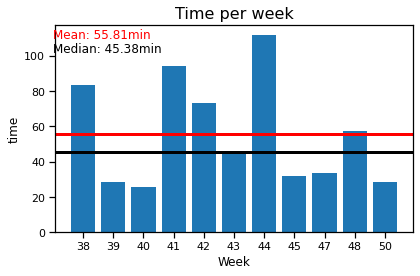

In [26]:
fig, ax1 = plt.subplots()

ax1.bar(weekly.week, weekly.time)
ax1.set_xlabel('Week')
ax1.set_ylabel('time')
ax1.axhline(weekly.time.median(), color='black', linewidth=3)
ax1.axhline(weekly.time.mean(), color='red', linewidth=3)
plt.text(-1,round(weekly.time.max(),2)-2,f"Mean: {round(weekly.time.mean(),2)}min",rotation=0, color='red')
plt.text(-1,round(weekly.time.max(),2)-10,f"Median: {round(weekly.time.median(),2)}min",rotation=0, color='black')


plt.title('Time per week',size=16)
plt.tight_layout()
plt.savefig('./images/weekly_time')